In [2]:
# import our libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns

In [144]:
# read data
df = pd.read_csv(r"D:\15 Development\15 Data Analyst\15 Projects\02 Big Projects\01 Data Analyst Portfolio Projects\Dataset\04 Movie Pandas\archive\movies.csv")

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Data Cleaning

In [6]:
# there are few ways to chech missing data
#first is by info and you can check by your eyes the difference between the totla and each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [10]:
# second here by for loop and return the percentage of the missing data (null data)
for c in df.columns:
    percent = np.mean(df[c].isnull())
    print("{} - {:.2f}%".format(c, percent))

name - 0.00%
rating - 0.01%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.28%
gross - 0.02%
company - 0.00%
runtime - 0.00%


In [12]:
# third using isnull()
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [16]:
# so now we can drop the null data however its quite much
df.dropna(inplace=True)

In [18]:
#So now we have 5421 row
df.shape[0]

5421

In [20]:
# lets change the data type for few columns
df["votes"] = df["votes"].astype(int)
df["budget"] = df["budget"].astype(int)
df["gross"] = df["gross"].astype(int)

In [21]:
# now it looks better than float
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [28]:
# no need for released column so lets drop it
df.drop(["released"], axis=1, inplace=True)

In [154]:
# now lets make sorting
# here sorting by Gross
df.sort_values(by=["gross"], inplace=False, ascending=False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1.515341e+09,Universal Pictures,137.0
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0


In [162]:
# here sorting by Score
df.sort_values(by=["score"], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5306,Disaster Movie,PG-13,Comedy,2008,"August 29, 2008 (United States)",1.9,88000.0,Jason Friedberg,Jason Friedberg,Carmen Electra,United States,20000000.0,3.481682e+07,Lionsgate,87.0
4594,Superbabies: Baby Geniuses 2,PG,Comedy,2004,"August 27, 2004 (United States)",1.9,30000.0,Bob Clark,Robert Grasmere,Jon Voight,Germany,20000000.0,9.448644e+06,ApolloMedia Distribution,88.0
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0


In [161]:
# lets chech all the list cause im exciting about the top rating movies
pd.set_option('display.max_rows', 10)

In [155]:
# here you are the best sort ever for you to enjoy watching (sorting by year and score)
year = df.groupby(["year", "score"])
enjoy_list = year.first().sort_values(by=["year", "score"], inplace=False, ascending=False)
# enjoy_list.to_csv('enjoy_list.csv')
enjoy_list.head(15)

name     rating      genre  \
year score                                                   
2020 7.4                       Tenet      PG-13     Action   
     7.1           The Invisible Man          R      Drama   
     6.8        The Call of the Wild         PG  Adventure   
     6.7                        Leap       None      Drama   
     6.6           Bad Boys for Life          R     Action   
     6.5          Sonic the Hedgehog         PG     Action   
     6.1               Birds of Prey          R     Action   
     5.7    Star Trek First Frontier       None     Sci-Fi   
     5.6                    Dolittle         PG  Adventure   
     5.4           Wonder Woman 1984      PG-13     Action   
     5.0                       Tulsa      PG-13     Comedy   
     4.7                 Dream Round       None     Comedy   
     3.4                   I Am Fear  Not Rated     Horror   
     3.1                More to Life       None      Drama   
2019 8.6                    Parasite          R     Comedy   

                                      released     votes           director  \
year score                                                                    
2020 7.4     September 3, 2020 (United States)  387000.0  Christopher Nolan   
     7.1     February 28, 2020 (United States)  186000.0     Leigh Whannell   
     6.8     February 21, 2020 (United States)   42000.0      Chris Sanders   
     6.7    September 25, 2020 (United States)     903.0  Peter Ho-Sun Chan   
     6.6      January 17, 2020 (United States)  140000.0       Adil El Arbi   
     6.5     February 14, 2020 (United States)  102000.0        Jeff Fowler   
     6.1      February 7, 2020 (United States)  190000.0          Cathy Yan   
     5.7     September 8, 2020 (United States)     165.0      Kenneth Smith   
     5.6      January 17, 2020 (United States)   53000.0     Stephen Gaghan   
     5.4     December 25, 2020 (United States)  217000.0      Patty Jenkins   
     5.0          June 3, 2020 (United States)     294.0        Scott Pryor   
     4.7      February 7, 2020 (United States)      36.0       Dusty Dukatz   
     3.4         March 3, 2020 (United States)     447.0      Kevin Shulman   
     3.1      October 23, 2020 (United States)      18.0      Joseph Ebanks   
2019 8.6      November 8, 2019 (United States)  631000.0       Bong Joon Ho   

                       writer                   star        country  \
year score                                                            
2020 7.4    Christopher Nolan  John David Washington  United States   
     7.1       Leigh Whannell         Elisabeth Moss         Canada   
     6.8        Michael Green          Harrison Ford         Canada   
     6.7             Ji Zhang                Gong Li          China   
     6.6          Peter Craig             Will Smith  United States   
     6.5            Pat Casey           Ben Schwartz  United States   
     6.1     Christina Hodson          Margot Robbie  United States   
     5.7         Keith Brooks          Robert Pralgo  United States   
     5.6       Stephen Gaghan      Robert Downey Jr.  United States   
     5.4        Patty Jenkins              Gal Gadot  United States   
     5.0          Scott Pryor            Scott Pryor  United States   
     4.7          Lisa Huston       Michael Saquella  United States   
     3.4        Kevin Shulman         Kristina Klebe  United States   
     3.1        Joseph Ebanks           Shannon Bond  United States   
2019 8.6         Bong Joon Ho           Kang-ho Song    South Korea   

                 budget        gross                    company  runtime  
year score                                                                
2020 7.4    205000000.0  363656624.0               Warner Bros.    150.0  
     7.1      7000000.0  143151000.0         Universal Pictures    124.0  
     6.8    135000000.0  111105497.0       20th Century Studios    100.0  
     6.7            NaN   25818882.0              

In [60]:
# checking the duplicated values
df.duplicated().sum()
# zero duplicate

0

In [113]:
(df["gross"] < 0).sum()
neg_gross = df.query("gross < 0")
neg_gross

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0


In [163]:
df.drop([3045, 5445, 7445], inplace=True)

In [165]:
(df["gross"] < 0).sum()

0

In [178]:
# x = list(df[(df["gross"] < 1000000)]["gross"])

## Data Visualization

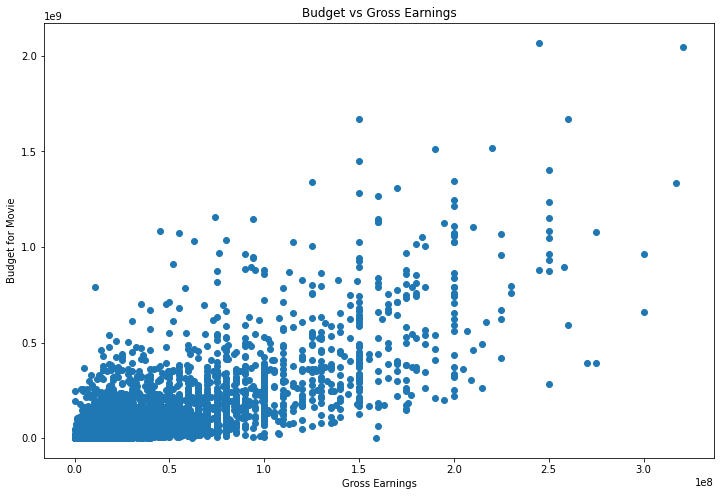

In [130]:
plt.scatter(x=df["budget"], y=df["gross"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget for Movie")
plt.show()

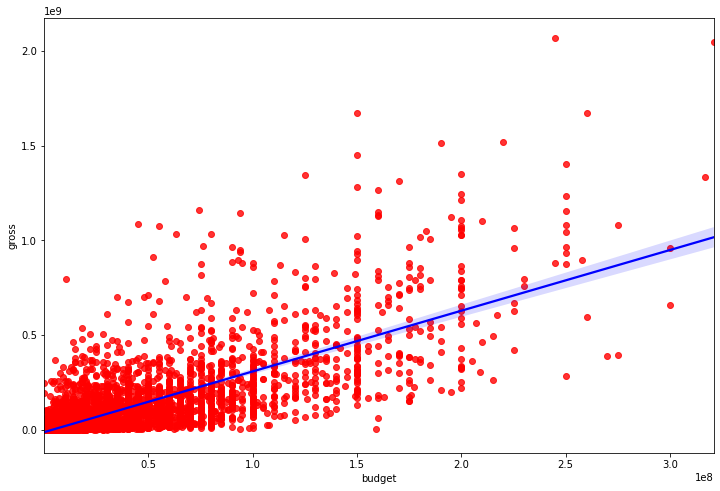

In [135]:
# plot the budget vs gross using seaborn
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"});

In [137]:
# lsts start to look at correlation
df.corr(method="pearson")  # method="pearson, kendall, spearman"

,year,score,votes,budget,gross,runtime
year,1.000000,0.055746,0.205973,0.328175,0.283780,0.074210
score,0.055746,1.000000,0.473405,0.067334,0.221701,0.412577
votes,0.205973,0.473405,1.000000,0.431864,0.613791,0.345443
budget,0.328175,0.067334,0.431864,1.000000,0.743536,0.311063
gross,0.283780,0.221701,0.613791,0.743536,1.000000,0.261947
runtime,0.074210,0.412577,0.345443,0.311063,0.261947,1.000000


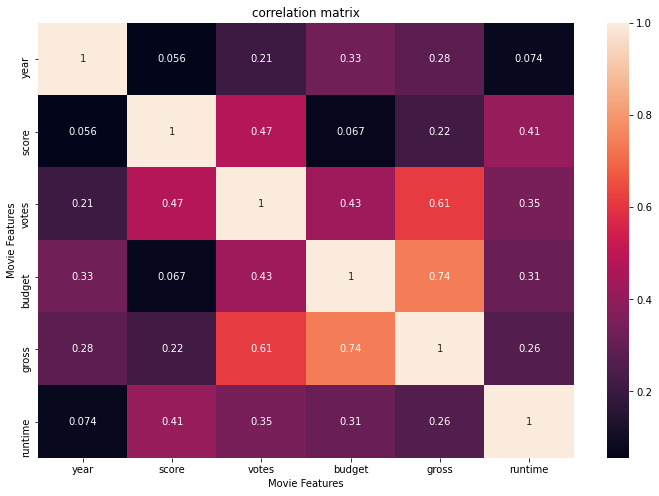

In [140]:
# high correlation between gross and budget
correlation_matrix = df.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("correlation matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show();

In [180]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6585,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5571,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5140,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1025,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3703,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1676,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4715,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2841,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


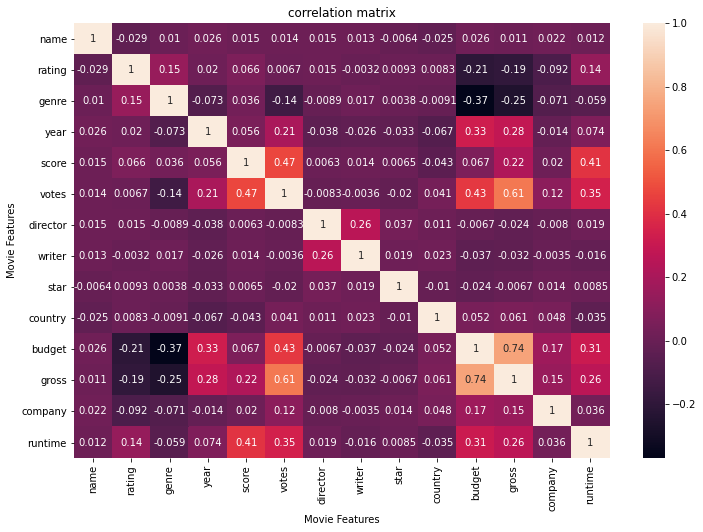

In [146]:
# high correlation between gross and budget after numerized df
correlation_matrix = df_numerized.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("correlation matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show();

In [148]:
correlation_mat = df_numerized.corr()

In [157]:
corr_pairs = correlation_mat.unstack()
corr_pairs.head(10)

name  name        1.000000
      rating     -0.029317
      genre       0.010041
      year        0.026334
      score       0.015062
      votes       0.013925
      director    0.014821
      writer      0.012562
      star       -0.006365
      country    -0.025411
dtype: float64

In [158]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head(10)

budget  genre    -0.369849
genre   budget   -0.369849
        gross    -0.252619
gross   genre    -0.252619
budget  rating   -0.205162
rating  budget   -0.205162
        gross    -0.190168
gross   rating   -0.190168
genre   votes    -0.135750
votes   genre    -0.135750
dtype: float64

In [151]:
high_corr = sorted_pairs[(corr_pairs) > 0.5]
high_corr

gross     votes       0.613791
votes     gross       0.613791
budget    gross       0.743536
gross     budget      0.743536
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [159]:
# vates and budget have the highest correlation to gross earnings
# company has low correlation